In [1]:
import psycopg2
import pandas as pd

In [2]:
import configparser

config = configparser.ConfigParser()
# read the configuration file
config.read('/Users/jobdulo/Documents/etl_sandbox/mlopsKafka/ecommerce_monitor/postgres_db_credentials.txt')

['/Users/jobdulo/Documents/etl_sandbox/mlopsKafka/ecommerce_monitor/postgres_db_credentials.txt']

In [3]:
# establish connection to PostgreSQl
conn = psycopg2.connect(
    dbname=config.get('Credentials', 'db_name'),
    user=config.get('Credentials', 'username'),
    password=config.get('Credentials', 'password'),
    host=config.get('Credentials', 'host'),
    port=config.get('Credentials', 'port')
)

In [4]:
# query data into dataframe
query = "SELECT * FROM activity_log;"
df = pd.read_sql_query(query, conn)

In [5]:
df.head()

,id,user_id,activity_type,product_id,timestamp
0,1,840,product_view,78.0,2023-12-04 14:08:31
1,2,724,purchase,67.0,2023-12-04 14:08:34
2,3,705,page_view,NaN,2023-12-04 14:08:39
3,4,946,product_view,51.0,2023-12-04 14:08:40
4,5,283,purchase,40.0,2023-12-04 14:08:41


<AxesSubplot: xlabel='timestamp'>

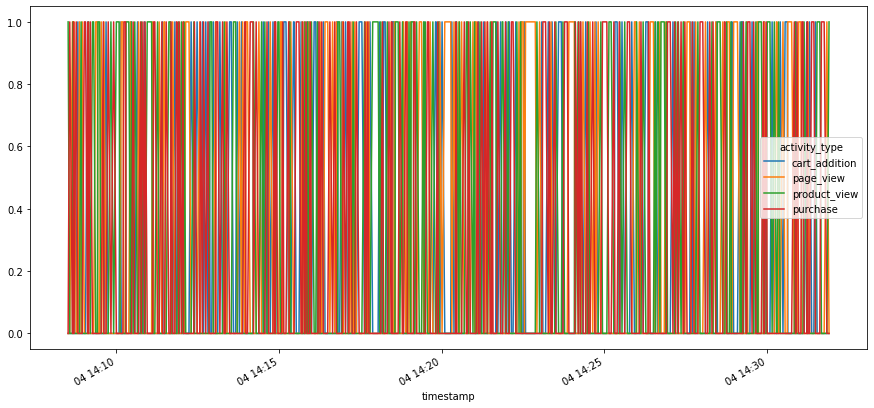

In [7]:
# activity trends by timestamp
activity_trends = df.groupby('timestamp').activity_type.value_counts().unstack().fillna(0)
activity_trends.plot(figsize=(15,7))


<AxesSubplot: >

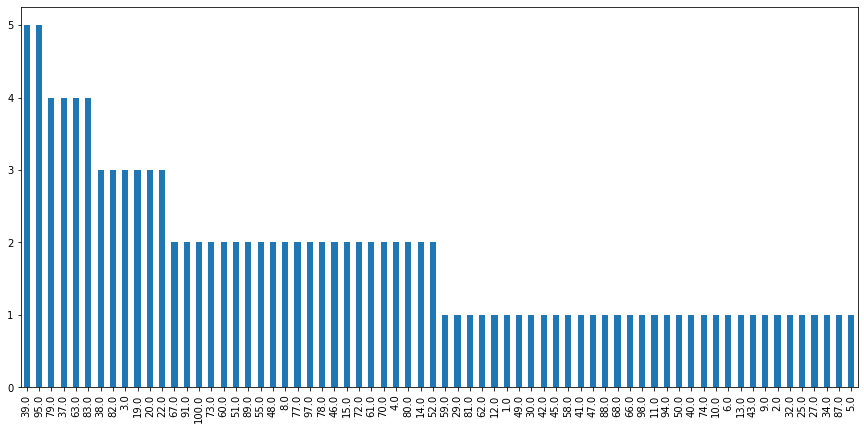

In [8]:
# most viewed products
most_viewed_products = df[df.activity_type == "product_view"].product_id.value_counts()

most_viewed_products.plot(kind='bar', figsize=(15, 7))

In [9]:
# cart abandonment rate
cart_additions = df[df.activity_type == "cart_addition"].shape[0]
purchases = df[df.activity_type == "purchase"].shape[0]

cart_abandonment_rate = (cart_additions - purchases) / cart_additions

print(f"Cart Abandonment Rate: {cart_abandonment_rate:.2%}")

Cart Abandonment Rate: -32.32%


In [13]:
# conversion rate
total_views = df[df.activity_type == "product_view"].shape[0]

conversion_rate = purchases / total_views

print(f"Conversion Rate: {conversion_rate:.2%}")

Conversion Rate: 107.38%


<AxesSubplot: xlabel='activity_type', ylabel='product_id'>

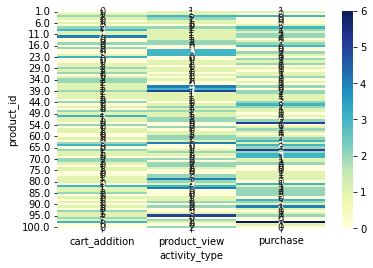

In [14]:
# visualization
import seaborn as sns

# Example: Heatmap of user activity
activity_pivot = df.pivot_table(index='product_id', columns='activity_type', aggfunc='size', fill_value=0)
sns.heatmap(activity_pivot, annot=True, cmap="YlGnBu")